In [ ]:
# Install dependencies if needed
!pip install transformers torch matplotlib seaborn


In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import GPT2Tokenizer, GPT2Model


In [2]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2", output_attentions=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [3]:
text = "Once upon a time in a college classroom"
inputs = tokenizer(text, return_tensors="pt")


In [4]:
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions
# attentions shape: (num_layers, batch, num_heads, seq_len, seq_len)
print("Attention shape:", [a.shape for a in attentions])

Attention shape: [torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8]), torch.Size([1, 12, 8, 8])]


In [5]:
layer = 0   # first layer
head = 0    # first head
attention_matrix = attentions[layer][0, head].numpy()

In [6]:
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

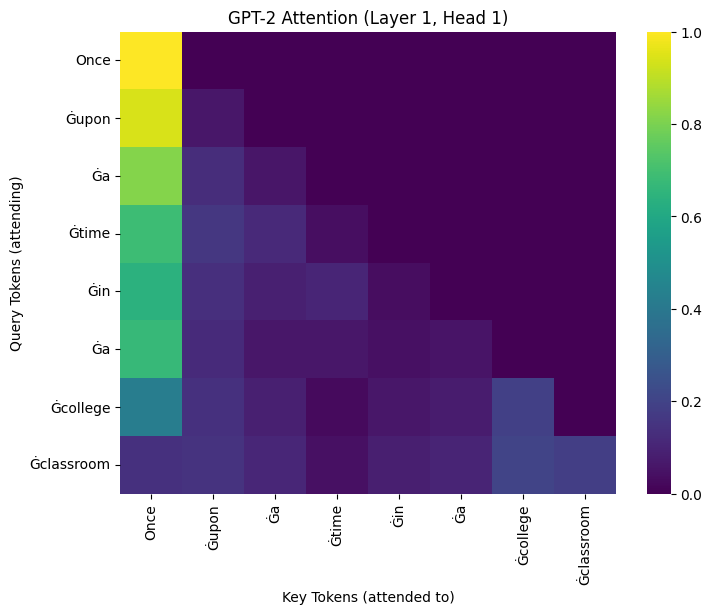

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title(f"GPT-2 Attention (Layer {layer+1}, Head {head+1})")
plt.xlabel("Key Tokens (attended to)")
plt.ylabel("Query Tokens (attending)")
plt.show()